In [227]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data


In [2]:
#import excel produced from analysis programme
df = pd.read_csv('combined.csv')

In [3]:
df.head()

,Molecule ID,Mw,AlogP,Lead-likeness penalty,tPSA,Carbon sp3 fraction,PMI x (I1),PMI y (I2),Heavy atoms,Aliphatic rings,...,% activity@ Autophagy,% activity@ Autophagy rapamycin,% activity@ Hedgehog osteogenesis,% activity@ Hedgehog osteogenesis-Viability,IC50 (åµM)@ Hedgehog osteogenesis,IC50 (åµM)@ Hedgehog osteogenesis-Viability,SMILES,TO Displacement,STDEV,Purity (%) @LCMS
0,46,354.44,0.09,0,69.64,0.647059,0.29429,0.88841,24,3,...,78.0,80.0,103.0,85.0,NaN,NaN,O[C@@H]1[C@@H]2C[C@@H](S(=O)(C)=O)[C@@H](N2CC3...,2.33%,2.28%,81.0
1,97,354.44,1.30,0,57.69,0.588235,0.20438,0.92351,24,2,...,101.0,82.0,114.0,51.0,NaN,NaN,CN(C(C1=CC=C(F)C=C1)=O)[C@H]2[C@@H]3C[C@@H](S(...,14.98%,4.12%,84.0
2,47,299.36,0.30,0,66.40,0.571429,0.25676,0.88021,20,2,...,85.0,81.0,114.0,85.0,NaN,NaN,FC(C=C1)=CC=C1[C@@H]2[C@H](N3)[C@H](S(=O)(C)=O...,0.46%,2.37%,97.0
3,49,371.42,0.27,1,83.91,0.588235,0.50701,0.86133,25,2,...,NaN,NaN,NaN,NaN,NaN,NaN,O=C(N1[C@H]2[C@@H](C3=CC=C(F)C=C3)C[C@@H](O)[C...,-5.13%,1.90%,62.0
4,50,425.50,1.28,3,89.34,0.388889,0.48128,0.83397,28,2,...,73.0,70.0,100.0,63.0,NaN,NaN,FC(C=C1)=CC=C1[C@@H]2[C@H](N3S(=O)(C4=CN=CN4C)...,-19.90%,11.37%,95.0


In [44]:
df.columns

Index(['Molecule ID', 'Mw', 'AlogP', 'Lead-likeness penalty', 'tPSA',
       'Carbon sp3 fraction', 'PMI x (I1)', 'PMI y (I2)', 'Heavy atoms',
       'Aliphatic rings', 'Aromatic rings', 'Heteroatoms', 'Chiral centres',
       'Rotatable bonds', 'Supplier ID', 'Unnamed: 10',
       'NF54 test 1: IC50 (nM)', 'Unnamed: 12', 'NF54 test 2: IC50 (nM)',
       'Unnamed: 14', 'Average NF54: IC50 (nM)',
       'VISUAL MIC90 7D 7H9 GLU CAS TX (uM)',
       'VISUAL MIC90 7D  7H9 GLU ADC TW (uM)', '% activity@ Autophagy',
       '% activity@ Autophagy rapamycin', '% activity@ Hedgehog osteogenesis',
       '% activity@ Hedgehog osteogenesis-Viability',
       'IC50 (åµM)@ Hedgehog osteogenesis',
       'IC50 (åµM)@ Hedgehog osteogenesis-Viability', 'SMILES',
       'TO Displacement', 'STDEV', 'Purity (%) @LCMS'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 33 columns):
Molecule ID                                    44 non-null int64
Mw                                             44 non-null float64
AlogP                                          44 non-null float64
Lead-likeness penalty                          44 non-null int64
tPSA                                           44 non-null float64
Carbon sp3 fraction                            44 non-null float64
PMI x (I1)                                     44 non-null float64
PMI y (I2)                                     44 non-null float64
Heavy atoms                                    44 non-null int64
Aliphatic rings                                44 non-null int64
Aromatic rings                                 44 non-null int64
Heteroatoms                                    44 non-null int64
Chiral centres                                 44 non-null int64
Rotatable bonds                         

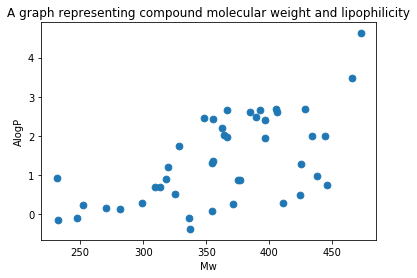

In [5]:
#creating a graph for all compounds
df.plot(kind='scatter',x='Mw',y='AlogP', s = 45) # scatter plot
plt.title('A graph representing compound molecular weight and lipophilicity')
plt.rcParams.update({'font.size': 14})
fig_size = plt.rcParams["figure.figsize"] #Get current size
fig_size[0] = 8                        #Set figure width to 12 and height to 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('MWvsAlogP.png', dpi=300)
plt.show()

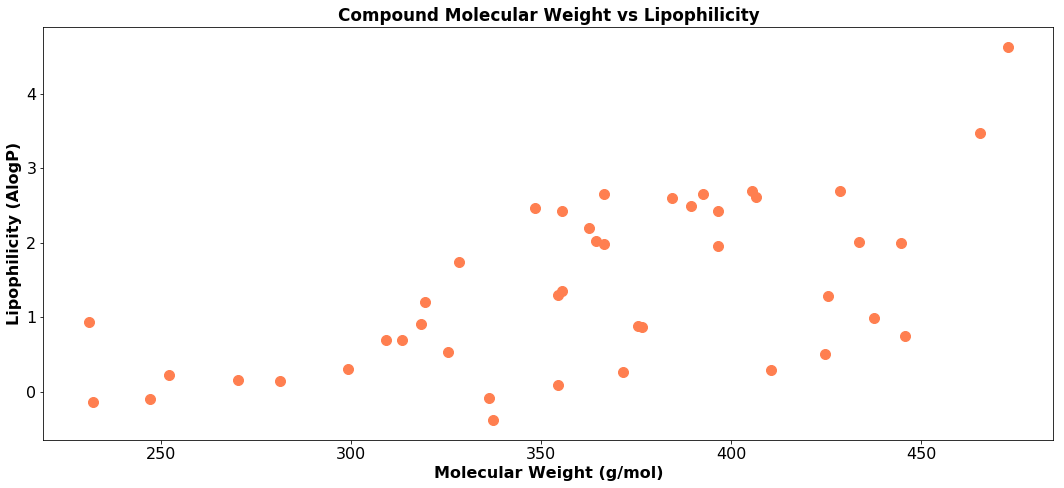

In [6]:
#plot without legend and with correct figure size and wanted colours
ax = df.plot(kind='scatter',x='Mw',y='AlogP',
              figsize=(15,7), color=['coral'], legend=False, s = 100);
ax.set_alpha(0.8)
#plot title, x, y
plt.title('Compound Molecular Weight vs Lipophilicity', weight = 'bold')
#ticks
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
#labels
plt.xlabel('Molecular Weight (g/mol)', weight = 'bold', fontsize=16)
plt.ylabel('Lipophilicity (AlogP)', weight = 'bold', fontsize=16)
#fade background
ax.patch.set_facecolor('#FFFFFF')
#tight layout
plt.tight_layout()
plt.show()

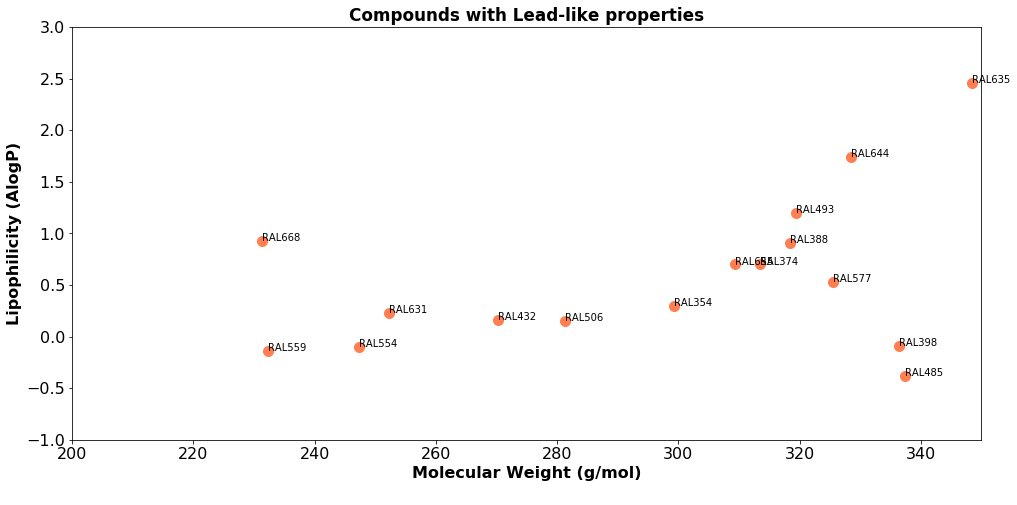

In [7]:
#plot lead-like compounds with supplier ID at each point
y = df['AlogP']
z = df['Mw']
n = df['Supplier ID']

fig, ax = plt.subplots()
ax.scatter(z, y, s = 100, color = 'coral')

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), rotation=0, fontsize=10)

#set figure size
fig.set_size_inches(14, 7)

#plot title, x, y
plt.title('Compounds with Lead-like properties', weight = 'bold')

#ticks
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
#labels
plt.xlabel('Molecular Weight (g/mol)', weight = 'bold', fontsize=16)
plt.ylabel('Lipophilicity (AlogP)', weight = 'bold', fontsize=16)
#limit
plt.ylim(-1, 3)
plt.xlim(200, 350)
#fade background
ax.patch.set_facecolor('#FFFFFF')
#tight layout
plt.tight_layout()
plt.show()

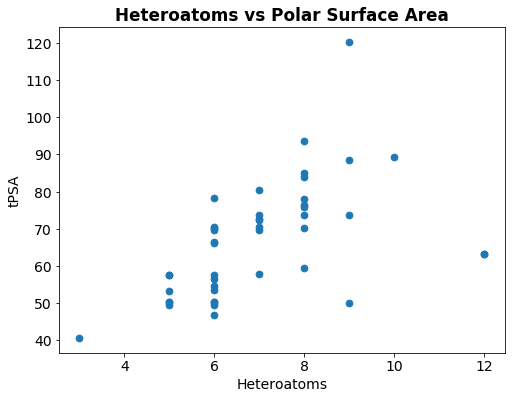

In [47]:
#creating a graph for all compounds relationship between hetroatoms and PSA
df.plot(kind='scatter',x='Heteroatoms',y='tPSA', s = 45) # scatter plot
plt.title('Heteroatoms vs Polar Surface Area', weight = 'bold')
plt.rcParams.update({'font.size': 14})
fig_size = plt.rcParams["figure.figsize"] #Get current size
fig_size[0] = 8                        #Set figure width to 12 and height to 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('MWvsAlogP.png', dpi=300)
plt.show()

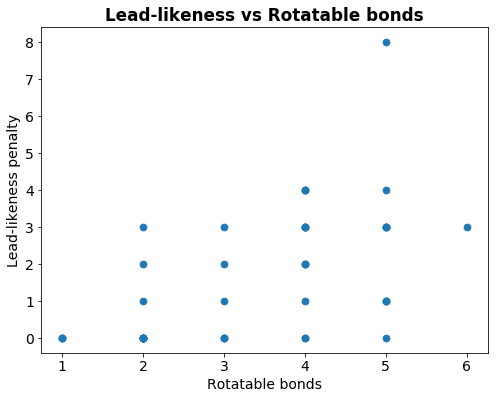

In [49]:
#creating a graph for all compounds relationship between hetroatoms and PSA
df.plot(kind='scatter',x='Rotatable bonds',y='Lead-likeness penalty', s = 45) # scatter plot
plt.title('Lead-likeness vs Rotatable bonds', weight = 'bold')
plt.rcParams.update({'font.size': 14})
fig_size = plt.rcParams["figure.figsize"] #Get current size
fig_size[0] = 8                        #Set figure width to 12 and height to 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('MWvsAlogP.png', dpi=300)
plt.show()

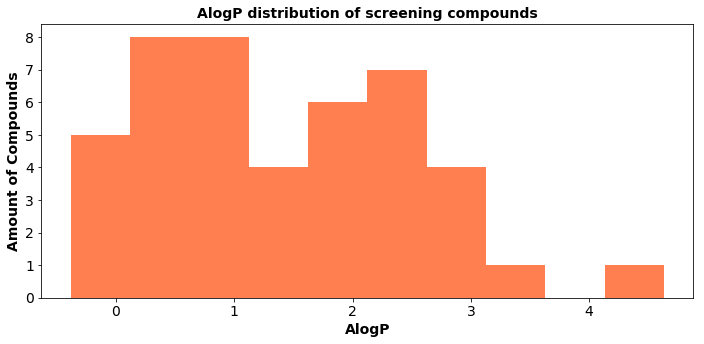

In [8]:
ax = df['AlogP'].plot(kind='hist', figsize=(10,5), color=['coral']);
ax.set_alpha(0.8)
#pd.DataFrame.hist(df[['AlogP']])
plt.xlabel('AlogP', weight = 'bold', fontsize=14)
plt.ylabel('Amount of Compounds', weight = 'bold', fontsize=14)
plt.title('AlogP distribution of screening compounds', weight = 'bold', fontsize=14)
#fade background
ax.patch.set_facecolor('#FFFFFF')
#tight layout
plt.tight_layout()
plt.show()

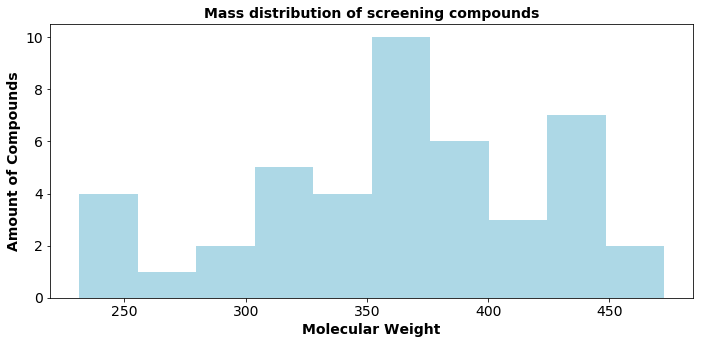

In [9]:
#pd.DataFrame.hist(df[['Mw']])
#plt.xlabel('Mw')
#plt.ylabel('Amount of Compounds')
#plt.title('Mass distribution of screening compounds')
#plt.show()

ax = df['Mw'].plot(kind='hist', figsize=(10,5), color=['lightblue']);
ax.set_alpha(0.8)
#pd.DataFrame.hist(df[['AlogP']])
plt.xlabel('Molecular Weight', weight = 'bold', fontsize=14)
plt.ylabel('Amount of Compounds', weight = 'bold', fontsize=14)
plt.title('Mass distribution of screening compounds', weight = 'bold', fontsize=14)
#fade background
ax.patch.set_facecolor('#FFFFFF')
#tight layout
plt.tight_layout()
plt.show()

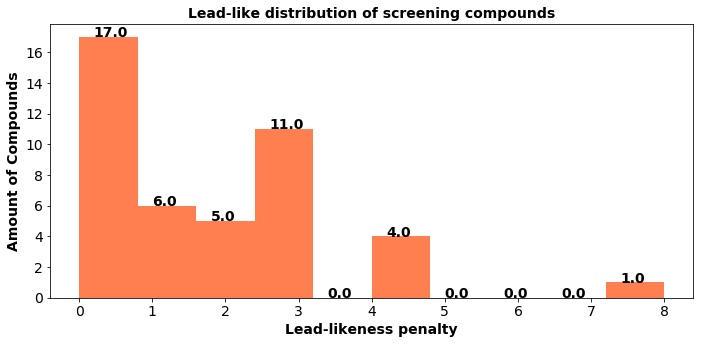

In [50]:
ax = df['Lead-likeness penalty'].plot(kind='hist', figsize=(10,5), color=['coral']);
ax.set_alpha(0.8)
#pd.DataFrame.hist(df[['AlogP']])
plt.xlabel('Lead-likeness penalty', weight = 'bold', fontsize=14)
plt.ylabel('Amount of Compounds', weight = 'bold', fontsize=14)
plt.title('Lead-like distribution of screening compounds', weight = 'bold', fontsize=14)



# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.2, i.get_height(), str(i.get_height()), fontsize=14, color='black', weight = 'bold')
#fade background
ax.patch.set_facecolor('#FFFFFF')
#tight layout
plt.tight_layout()
plt.show()

In [10]:
df = df.append({'Supplier ID':'1% ZINC database','Carbon sp3 fraction':'0.33'}, ignore_index=True)

df['Carbon sp3 fraction']=df['Carbon sp3 fraction'].astype(float)
df.tail()

,Molecule ID,Mw,AlogP,Lead-likeness penalty,tPSA,Carbon sp3 fraction,PMI x (I1),PMI y (I2),Heavy atoms,Aliphatic rings,...,% activity@ Autophagy,% activity@ Autophagy rapamycin,% activity@ Hedgehog osteogenesis,% activity@ Hedgehog osteogenesis-Viability,IC50 (åµM)@ Hedgehog osteogenesis,IC50 (åµM)@ Hedgehog osteogenesis-Viability,SMILES,TO Displacement,STDEV,Purity (%) @LCMS
40,135.0,428.52,2.69,3.0,70.40,0.434783,0.38053,0.81362,30.0,2.0,...,89.0,91.0,145.0,80.0,NaN,NaN,FC(C=C1)=CC=C1[C@@H]2[C@H](N3C)[C@H](S(=O)(C)=...,-35.68%,3.64%,96.0
41,141.0,337.44,-0.38,0.0,73.74,0.687500,0.20302,0.92813,23.0,3.0,...,73.0,72.0,132.0,70.0,NaN,NaN,OC1[C@@H]2C[C@@H](S(=O)(C)=O)[C@@H](N2C)[C@@H]...,-72.20%,12.85%,100.0
42,142.0,366.49,1.98,1.0,49.41,0.684211,0.46306,0.67555,25.0,3.0,...,94.0,88.0,80.0,83.0,NaN,NaN,FC(C=C1)=CC=C1[C@@H]2[C@H](N3C)[C@H](S(=O)(C)=...,-8.57%,7.74%,100.0
43,143.0,364.46,2.02,1.0,72.64,0.611111,0.24659,0.88102,25.0,2.0,...,96.0,61.0,120.0,0.0,NaN,NaN,CC(C)N1[C@H]2CC[C@@H](OC3=NC(C=CC=C4)=C4O3)[C@...,9.40%,4.43%,95.0
44,NaN,NaN,NaN,NaN,NaN,0.330000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


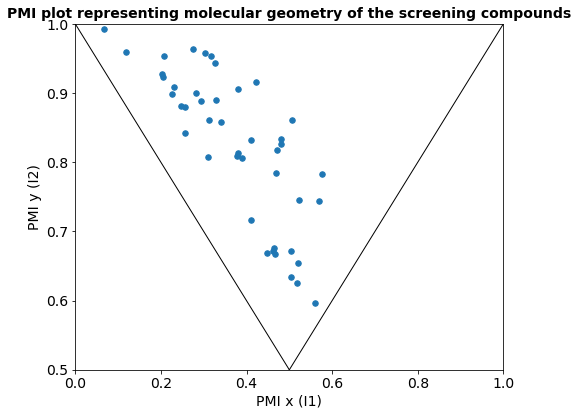

In [11]:
#creating a graph for all compounds
df.plot(kind='scatter',x='PMI x (I1)',y='PMI y (I2)', s=30) # scatter plot
plt.ylim(0.5, 1)
plt.xlim(0, 1)
plt.title('PMI plot representing molecular geometry of the screening compounds', weight = 'bold', fontsize=14)
# draw vertical line from 
plt.plot([0.5, 0], [0.5, 1], 'k-', lw=1)
plt.plot([0.5, 1], [0.5, 1], 'k-', lw=1)

plt.tight_layout()
plt.show()

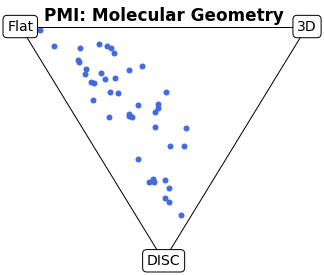

In [119]:
f, ax1 = plt.subplots(1,1, figsize=(4.5,4))

#draw boxes in each corner
an1 = ax1.annotate("DISC", xy=(0.5, 0.5), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))
an1 = ax1.annotate("3D", xy=(1, 1), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))
an1 = ax1.annotate("Flat", xy=(0, 1), xycoords="data",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))

#set limits
ax1.set_ylim(0.5,1)
ax1.set_xlim(0,1)
#set title
ax1.set_title('PMI: Molecular Geometry', weight = 'bold')
#set scatter plot
ax1.scatter(df['PMI x (I1)'], df['PMI y (I2)'], s=25, c='royalblue')
#draw triangle around plot
ax1.plot([0.5, 0], [0.5, 1], 'k-', lw=1)
ax1.plot([0.5, 1], [0.5, 1], 'k-', lw=1)
ax1.plot([1, 1], 'k-', lw=1)

ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])

# Hide "spines" on axis
ax1.set_axis_off()  
plt.tight_layout()
plt.savefig('PMI.png', dpi=300)
plt.show()

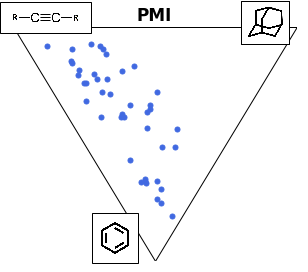

In [226]:
if 1:
    fig, ax1 = plt.subplots(1,1, figsize=(4.5,4))

    # Define a 1st position to annotate (display it with a marker)
    xy = (0.5, 0.7)
    #ax1.plot(xy[0], xy[1], ".r")
    ax1.scatter(df['PMI x (I1)'], df['PMI y (I2)'], s=25, c='royalblue')
    # Annotate the 1st position with a text box ('Test 1')
    offsetbox = TextArea("")
    arr_img = plt.imread('ada.jpg')
    

    imagebox = OffsetImage(arr_img, zoom=0.05)
    imagebox.image.axes = ax1

    ab = AnnotationBbox(imagebox, xy,
                        xybox=(110, 145),
                        xycoords='data',
                        boxcoords="offset points",
                        )
    ax1.add_artist(ab)


    ax1.add_artist(ab)
    #draw triangle around plot
    ax1.plot([0.5, 0], [0.5, 1], 'k-', lw=1)
    ax1.plot([0.5, 1], [0.5, 1], 'k-', lw=1)
    ax1.plot([1, 1], 'k-', lw=1)
    # Annotate the 2nd position with another image (a Grace Hopper portrait)
    #fn = get_sample_data("grace_hopper.png", asfileobj=False)
    arr_img = plt.imread('disc.jpg')
    

    imagebox = OffsetImage(arr_img, zoom=0.05)
    imagebox.image.axes = ax1

    ab = AnnotationBbox(imagebox, xy,
                        xybox=(-40., -70.),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.5,
                        #arrowprops=dict(
                            #arrowstyle="->",
                            #connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )

    ax1.add_artist(ab)

    
    arr_img = plt.imread('alkyne.jpg')
    

    imagebox = OffsetImage(arr_img, zoom=0.08)
    imagebox.image.axes = ax1

    ab = AnnotationBbox(imagebox, xy,
                        xybox=(-110, 150),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.5,
                        #arrowprops=dict(
                            #arrowstyle="->",
                            #connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )

    ax1.add_artist(ab)
    
    # Fix the display limits to see everything
    ax1.set_title('PMI', weight = 'bold')
    ax1.set_ylim(0.5,1)
    ax1.set_xlim(-0.01,1)
    ax1.axes.get_xaxis().set_ticks([])
    ax1.axes.get_yaxis().set_ticks([])
    ax1.set_axis_off()  
    plt.tight_layout()
    plt.show()


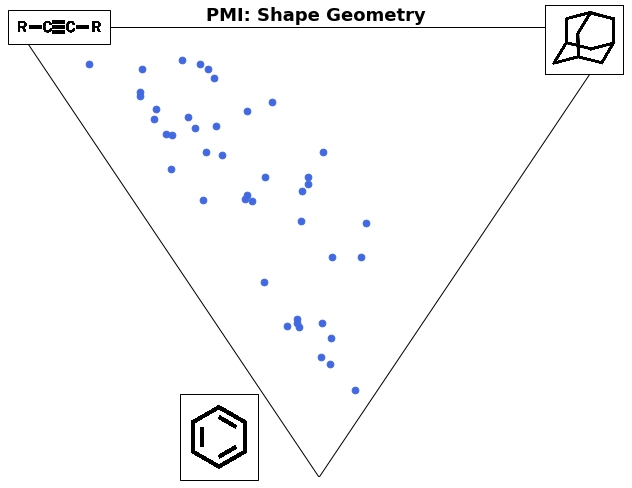

In [286]:

if 1:
    fig, ax1 = plt.subplots(1,1, figsize=(9,7))

    # Define a 1st position to annotate (display it with a marker)
    xy = (0.5, 0.7)
    #ax1.plot(xy[0], xy[1], ".r")
    ax1.scatter(df['PMI x (I1)'], df['PMI y (I2)'], s=45, c='royalblue')
    # Annotate the 1st position with a text box ('Test 1')
    offsetbox = TextArea("")
    arr_img = plt.imread('ada.jpg')
    

    imagebox = OffsetImage(arr_img, zoom=0.09)
    imagebox.image.axes = ax1

    ab = AnnotationBbox(imagebox, xy,
                        xybox=(265, 258),
                        xycoords='data',
                        boxcoords="offset points",
                        )
    ax1.add_artist(ab)


    ax1.add_artist(ab)
    #draw triangle around plot
    ax1.plot([0.5, 0], [0.5, 1], 'k-', lw=1)
    ax1.plot([0.5, 1], [0.5, 1], 'k-', lw=1)
    ax1.plot([1, 1], 'k-', lw=1)
    # Annotate the 2nd position with another image (a Grace Hopper portrait)
    #fn = get_sample_data("grace_hopper.png", asfileobj=False)
    arr_img = plt.imread('disc.jpg')
    

    imagebox = OffsetImage(arr_img, zoom=0.1)
    imagebox.image.axes = ax1

    ab = AnnotationBbox(imagebox, xy,
                        xybox=(-100., -140.),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.5,
                        #arrowprops=dict(
                            #arrowstyle="->",
                            #connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )

    ax1.add_artist(ab)

    
    arr_img = plt.imread('alykne.jpg')
    

    imagebox = OffsetImage(arr_img, zoom=0.08)
    imagebox.image.axes = ax1

    ab = AnnotationBbox(imagebox, xy,
                        xybox=(-260, 270),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.5,
                        #arrowprops=dict(
                            #arrowstyle="->",
                            #connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )

    ax1.add_artist(ab)
    
    # Fix the display limits to see everything
    ax1.set_title('PMI: Shape Geometry', weight = 'bold', fontsize = '18')
    ax1.set_ylim(0.5,1)
    ax1.set_xlim(-0.01,1)
    ax1.axes.get_xaxis().set_ticks([])
    ax1.axes.get_yaxis().set_ticks([])
    ax1.set_axis_off()  
    plt.tight_layout()
    plt.savefig('Large-PMI.png', dpi=300)
    plt.show()


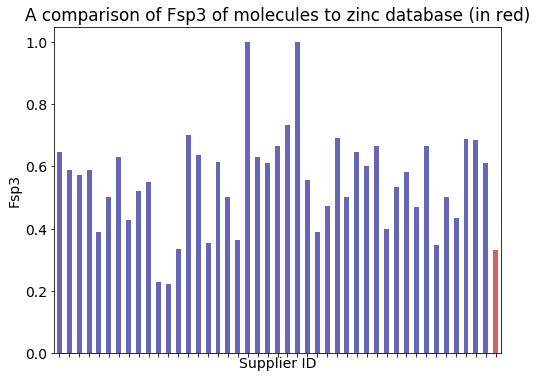

In [13]:
barlist = df.plot(kind='bar',x='Supplier ID',y='Carbon sp3 fraction', 
color=['#AA0000' if row['Carbon sp3 fraction'] == 0.33 else '#000088' for name,row in df.iterrows()], alpha=0.6, legend=False)
#fig_size = plt.rcParams["figure.figsize"] #Get current size
#fig_size[0] = 10                        
#fig_size[1] = 8
#plt.rcParams["figure.figsize"] = fig_size
plt.title('A comparison of Fsp3 of molecules to zinc database (in red)')
                            # hide x axis #
#ax1 = plt.axes()
#x_axis = ax1.axes.get_xaxis()
#x_axis.set_visible(False) 
plt.ylabel('Fsp3')
plt.xticks(visible=False)
plt.show()



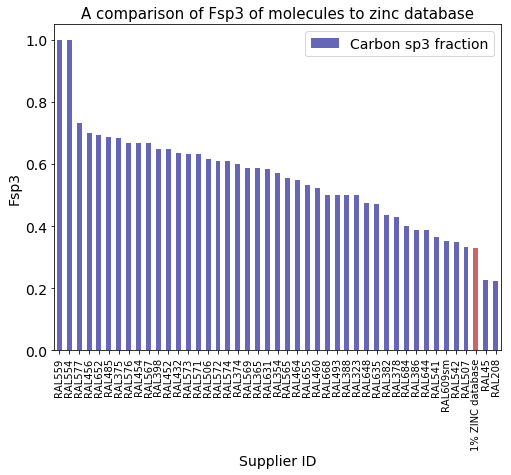

In [14]:
molecular_id = 'Supplier ID'
carbon_sp3 = 'Carbon sp3 fraction'

df_sorted = df.sort_values('Carbon sp3 fraction',ascending=False)
barlist = df_sorted.plot(kind='bar',x=molecular_id,y=carbon_sp3, 
color=['#AA0000' if row['Carbon sp3 fraction'] == 0.33 else '#000088' for name,row in df_sorted.iterrows()], alpha=0.6)
plt.xticks(fontsize = 10)
plt.title('A comparison of Fsp3 of molecules to zinc database', fontsize = '15')
plt.ylabel('Fsp3')
plt.show()


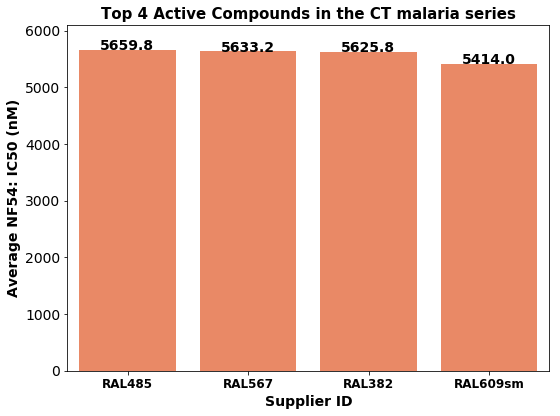

In [21]:
ActiveCompounds = df.nsmallest(4, 'Average NF54: IC50 (nM)').sort_values('Average NF54: IC50 (nM)',ascending=False)
ax = sns.barplot(x="Supplier ID", y="Average NF54: IC50 (nM)", data=ActiveCompounds, color='coral')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.17, i.get_height()-6, str(i.get_height()), fontsize=14, color='black', weight='bold')

#set ylabel bold
ax.set_ylabel('Average NF54: IC50 (nM)', weight='bold', fontsize=14)
#settitle bold
ax.set_title('Top 4 Active Compounds in the CT malaria series', weight='bold', fontsize=15)
plt.xlabel('Supplier ID', weight='bold', fontsize=14)

#changing fontsize for x labels
plt.xticks(fontsize=12, weight='bold')

#set background colour to white 
ax.patch.set_facecolor('#FFFFFF')

#neaten up layout
plt.tight_layout()

#change y limit
plt.ylim(0,6100) 
plt.show()

In [16]:
#change astype of both to float so can be in the correct format#change  
df['TO Displacement'] = df['TO Displacement'].str.replace('%','').astype(np.float64)
df['STDEV'] = df['STDEV'].str.replace('%','').astype(np.float64)

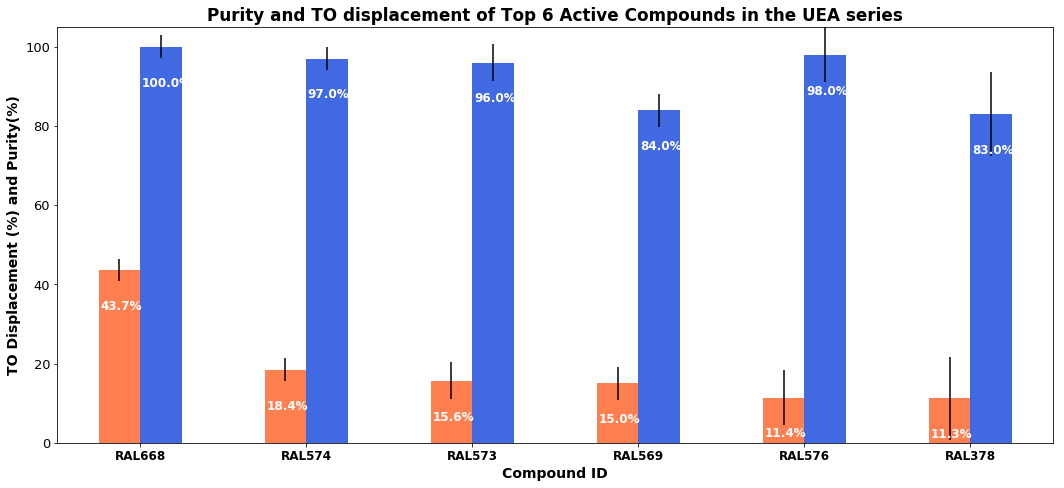

In [20]:

#Set index to X axis
UEA_results_index = df.set_index('Supplier ID')
#set to top 6 active compounds
ActiveCompounds_index = UEA_results_index.nlargest(6, 'TO Displacement').sort_values('TO Displacement',ascending=False)
#create new dataframe with the only desired columns
ActiveCompounds_index1 = ActiveCompounds_index[['TO Displacement', 'Purity (%) @LCMS']]

#plot without legend and with correct figure size and wanted colours
ax = ActiveCompounds_index1.plot(kind='bar',
              figsize=(15,7), color=['coral', 'royalblue'], fontsize=13, legend=False, yerr = ActiveCompounds_index['STDEV']);
ax.set_alpha(0.8)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.01, i.get_height()-10, \
            str(round((i.get_height()), 1)) + '%', fontsize=12, color='white',
                rotation=0, weight = 'bold')

#plot title, x, y
plt.title('Purity and TO displacement of Top 6 Active Compounds in the UEA series', weight = 'bold')
plt.xticks(rotation=0, fontsize=12, weight = 'bold')
plt.xlabel('Compound ID', weight = 'bold')
plt.ylabel('TO Displacement (%) and Purity(%)', weight = 'bold')
plt.ylim(0, 105)
#fade background
ax.patch.set_facecolor('#FFFFFF')
#tight layout
plt.tight_layout()
plt.show()

In [289]:
def pmi(x,y):
    
    if 1:
        fig, ax1 = plt.subplots(1,1, figsize=(9,7))
        xy = (0.5, 0.7)
        
        #ax1.scatter(df['PMI x (I1)'], df['PMI y (I2)'], s=45, c='royalblue')
        ax1.scatter(df[x], df[y], s=45, c='royalblue')
        # Annotate the 1st position with a text box ('Test 1')
        offsetbox = TextArea("")
        arr_img = plt.imread('ada.jpg')
    

        imagebox = OffsetImage(arr_img, zoom=0.09)
        imagebox.image.axes = ax1

        ab = AnnotationBbox(imagebox, xy, xybox=(265, 258),xycoords='data',boxcoords="offset points",)
        ax1.add_artist(ab)


        ax1.add_artist(ab)
        #draw triangle around plot
        ax1.plot([0.5, 0], [0.5, 1], 'k-', lw=1)
        ax1.plot([0.5, 1], [0.5, 1], 'k-', lw=1)
        ax1.plot([1, 1], 'k-', lw=1)
        # Annotate the 2nd position with another image (a Grace Hopper portrait)
        #fn = get_sample_data("grace_hopper.png", asfileobj=False)
        arr_img = plt.imread('disc.jpg')
    

        imagebox = OffsetImage(arr_img, zoom=0.1)
        imagebox.image.axes = ax1

        ab = AnnotationBbox(imagebox, xy,
                        xybox=(-100., -140.),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.5,
                        #arrowprops=dict(
                            #arrowstyle="->",
                            #connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )

        ax1.add_artist(ab)

    
        arr_img = plt.imread('alykne.jpg')
    

        imagebox = OffsetImage(arr_img, zoom=0.08)
        imagebox.image.axes = ax1

        ab = AnnotationBbox(imagebox, xy,
                        xybox=(-260, 270),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.5,
                        #arrowprops=dict(
                            #arrowstyle="->",
                            #connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )

        ax1.add_artist(ab)
    
        # Fix the display limits to see everything
        ax1.set_title('PMI: Shape Geometry', weight = 'bold', fontsize = '18')
        ax1.set_ylim(0.5,1)
        ax1.set_xlim(-0.01,1)
        ax1.axes.get_xaxis().set_ticks([])
        ax1.axes.get_yaxis().set_ticks([])
        ax1.set_axis_off()  
        plt.tight_layout()
        plt.savefig('Large-PMI.png', dpi=300)
        plt.show()
    return plt.show()

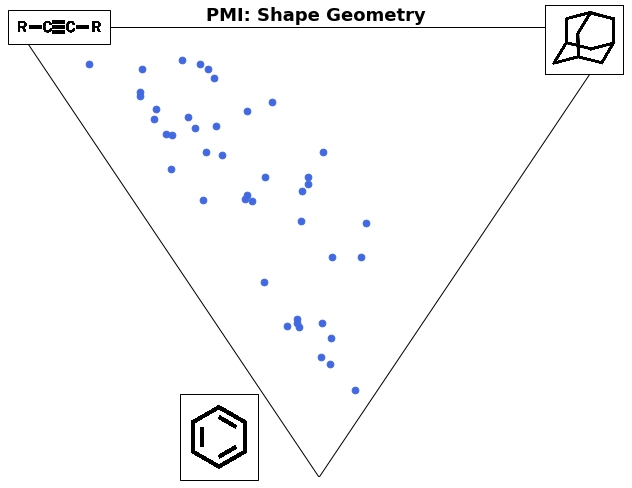

In [290]:
pmi('PMI x (I1)', 'PMI y (I2)')